In [1]:
import tensorflow as tf

In [4]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

In [5]:
#Pass the images to generator to create an input compatible for CNN

trainImageData = train_generator.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DatasetALandP/alien_vs_predator_thumbnails/data/train'
                ,batch_size=20,class_mode='binary',target_size=(64,64))

Found 694 images belonging to 2 classes.


In [6]:
testImageData = test_generator.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DatasetALandP/alien_vs_predator_thumbnails/data/validation'
                ,batch_size=20,class_mode='binary',target_size=(64,64))

Found 200 images belonging to 2 classes.


In [8]:
#Check shapes of training and testing data

print(trainImageData.image_shape)
print(testImageData.image_shape)

(64, 64, 3)
(64, 64, 3)


Architect a CNN layer

In [10]:
#Step 1 : Create first Convlutional layer
model = tf.keras.models.Sequential()

#Conv2D(no. of feature maps,kernelshape,input shape,activation fuction)
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu',padding='same'))

#Pooling operation

model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))

#Second CNN layer
#Conv2D(no. of feature maps,kernelshape,input shape,activation fuction)

model.add(tf.keras.layers.Conv2D(16,(3,3),input_shape=(64,64,3),activation='relu',padding='same'))

#Pooling operation

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [11]:
#Step 3 : Flattening Operation
model.add(tf.keras.layers.Flatten())

#Step4 : Connected Layers

model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))



In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [13]:
#Model Compliation

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [14]:
int(len(trainImageData.filenames)/trainImageData.batch_size)

34

In [15]:
#Model fitting

model.fit(trainImageData,validation_data=testImageData,epochs=50,steps_per_epoch=int(len(trainImageData.filenames)/trainImageData.batch_size)
,validation_steps = int(len(testImageData.filenames)/testImageData.batch_size))

Epoch 1/50
34/34 [==============================] - 710s 21s/step - loss: 0.6566 - accuracy: 0.6157 - val_loss: 0.6554 - val_accuracy: 0.6100
Epoch 2/50
34/34 [==============================] - 5s 138ms/step - loss: 0.5584 - accuracy: 0.7270 - val_loss: 0.5664 - val_accuracy: 0.7050
Epoch 3/50
34/34 [==============================] - 5s 138ms/step - loss: 0.4988 - accuracy: 0.7596 - val_loss: 0.5898 - val_accuracy: 0.7000
Epoch 4/50
34/34 [==============================] - 5s 138ms/step - loss: 0.3969 - accuracy: 0.8234 - val_loss: 0.5828 - val_accuracy: 0.6800
Epoch 5/50
34/34 [==============================] - 5s 140ms/step - loss: 0.3518 - accuracy: 0.8561 - val_loss: 0.5858 - val_accuracy: 0.6900
Epoch 6/50
34/34 [==============================] - 5s 138ms/step - loss: 0.2457 - accuracy: 0.9110 - val_loss: 0.7423 - val_accuracy: 0.7050
Epoch 7/50
34/34 [==============================] - 5s 138ms/step - loss: 0.2235 - accuracy: 0.9059 - val_loss: 0.6950 - val_accuracy: 0.7050
Epoch 

In [16]:
#Use the Model to classify the image

img = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/DatasetALandP/alien_vs_predator_thumbnails/data/train/alien/104.jpg',target_size=(64,64))

In [19]:
import cv2
i = cv2.imread('/content/drive/My Drive/Colab Notebooks/DatasetALandP/alien_vs_predator_thumbnails/data/train/alien/104.jpg')


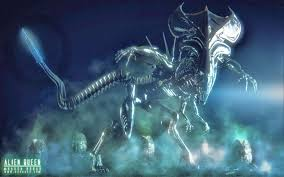

In [21]:
from google.colab.patches import cv2_imshow

cv2_imshow(i)

In [22]:
#Create an image array
imgArray = tf.keras.preprocessing.image.img_to_array(img)
imgArray.shape

(64, 64, 3)

In [23]:
#Make image compatoible for input

import numpy as np
compatibleImgArray = np.expand_dims(imgArray,axis=0)

compatibleImgArray.shape

(1, 64, 64, 3)

In [24]:
#Predict the class of the selected image

model.predict_classes(compatibleImgArray)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0]], dtype=int32)

In [25]:
trainImageData.class_indices

{'alien': 0, 'predator': 1}

In [26]:
if model.predict_classes(compatibleImgArray) == 0:
  print("Its an alien,rum now...")
else:
  print("Its a predator,hide")  

Its an alien,rum now...
